# Cepheid Variables & Leavitt's Law: Deriving Distances Across Space

## Background
Measuring distances is difficult. Unlike on earth where we can just take out a measuring tape, Astronomers have to figure out standards of distance; these standards make up what is known as the Distance Ladder and allow us to measure distances across space with great accuracy.

![image](distance_ladder.jpg)

One way we can think about measuring distance is with starlight. As you get further from an object, say a light bulb, it appears dimmer; as you move close to an object, it appears brighter. The brightness we measure drops off as an *inverse square law* where we have:
$ F = \frac{L}{4\pi{r^2}}$.
Here, $F$ is the apparent brightness of a star, $L$ is its intrinsic luminosity, and $r$ is our distance from it.  
#### Therefore, if know the intrinisc brightness of a star, you can measure its distance based on what you measure as its apparent brightness on Earth. 

Astronomers, however, often think of brightness in a (confusing) magnitude scale, where larger magnitudes are dimmer and smalller (or more negative) magnitudes represent brighter sources. Astronomers have created the *distance modulus* to represent the *inverse square law* behavoir of starlight in the magnitude scale:
### $m - M = 5\log_{10}(\frac{d}{10 \textrm{pc}})$
where $m$ is its apparent magnitude (what we see), $M$ is its intrinsic magnitude, and $d$ is its distance in parsecs.

In your project, you will be working with Cepheid variables, an important rung of the distance ladder for calibrating distances at *extragalactic scales*. A Cepheid variable is a type of regularly pulsating star with pulsation periods on the order of days to months. In the 1800s while studying a collection of Cepheid variables in a Milky Way satelite galaxy, Henrietta Swan Leavitt discovered that the *logarithm of the pulsation period of Cepheids is lineary related to its intrinsic luminosity*. Therefore, if we observe a Cepheid, we can figure out its intrinsic lumunoisty from its pulsation period, and thus know its distance from the *inverse square law* relationship. Edwin Hubble used Leavitt's Cepheid period relation to find the distance to our nearest galaxy, Andromeda (M31) and proving that M31 is in fact a seperate galaxy from the Milky Way, not a dusty nebular cloud.

![image](440px-HSLeavittHSCr13Fig2_1912.jpg)

### By the end of this project, you will be able to explain:
- How astronomers measure distances across space
- Variable stars
- Leavitt's law the Period-Luminosity relation

## Learning Questions
Please watch the following videos and answer these questions below.
- Cepheid Variables: https://www.youtube.com/watch?v=BWs-ONRDDG4
- The Distance Ladder: https://www.youtube.com/watch?v=rV-Z6jk9Fkw

### Q1. What is a Cepheid Variable and why can we measure distances with them?

### Q2. What is the distance ladder?

### Q3. Why are Cepheids a good standard candle?

### Q4. How did Edwin Hubble measure distances to other galaxies?

### Q5. From Earth, the Sun is very bright and has an apparent magnitude of around $m \sim -27$ mags. Say the Sun is placed 10 parsecs away from us, what is its *absolute magnitude* ($M$)?

## Project: Deriving Leavitt's Law
In this project, you will derive your own version of Leavitt's law and estimate the distance to Andromeda (M31), the nearest large galaxy to the Milky Way. 

## Imports

In [2]:
import pandas as pd #for reading in data files
import matplotlib.pyplot as plt #for plotting our data
import numpy as np #for certain math operations
from scipy import polyfit

## 1. Learning how to manipulate data: load Cepheid period and V-band magnitude

We have a catalog of various Cepheids with their periods ($P$) in years, Absolute Magnitude ($MV$), and Apparent Magnitude ($m$).

Galactic cepheid data is from the following catalog: Fernie, J.D., Beattie, B., Evans, N.R., and Seager, S. 1995, IBVS No. 4148

In [5]:
# read in cepheid database file (called 'cepheid_db.txt') and call this table c_data
c_data = pd.read_table('cepheids_db.txt', sep='\s+')

To see this data, you can simply type the variable c_data:

In [6]:
c_data

,ID,STAR,period,m,BV_INTMEAN,EBV,V_AMPL,MV,d,Z,RV_MEAN,RADIUS,BIN,1H?
0,2.0,SZAql,17.140849,8.599,1.389,0.641,1.163,-4.78,1898,-77,10.5,113.8,NaN,NaN
1,3.0,TTAql,13.754707,7.141,1.292,0.495,1.082,-4.51,1055,-58,1.9,95.8,NaN,NaN
2,4.0,FFAql,4.470916,5.372,0.756,0.224,0.321,-3.55,441,49,-19.4,NaN,NaN,NaN
3,5.0,FMAql,6.114230,8.270,1.277,0.646,0.724,-3.48,890,14,-7.0,53.8,NaN,NaN
4,6.0,FNAql,9.481603,8.382,1.214,0.510,0.564,-4.04,1473,-80,13.1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,500.0,XVul,6.319543,8.849,1.389,0.848,0.769,-3.53,891,-20,-16.1,46.2,NaN,NaN
349,502.0,ASVul,12.224726,12.251,1.923,1.245,0.919,-4.36,3551,78,NaN,NaN,NaN,NaN
350,503.0,BRVul,5.197170,10.687,1.474,0.911,0.813,-3.28,1693,-31,NaN,NaN,NaN,NaN
351,504.0,DGVul,13.608310,11.371,1.983,1.263,1.127,-4.49,2450,-39,2.6,NaN,NaN,NaN


What are the names of the columns of this table? Please list them below.

The columns we are interested in are:
- $m$, the apparent magnitude
- $MV$, the absolute magnitude in the V filter
- the period (measured in days)

To access columns in this table we can make specific calls. Say I want to get all the data in the period column; I can make a call like the following:

In [7]:
c_data['period']

0      17.140849
1      13.754707
2       4.470916
3       6.114230
4       9.481603
         ...    
348     6.319543
349    12.224726
350     5.197170
351    13.608310
352    12.643870
Name: period, Length: 353, dtype: float64

Making this call displays all the period data for our Cepheid sources. Try to access the absolute magnitude ($MV$) column with a similar call below:

## 2. Playing with the distance modulus
In this section, we will find the distance to each of our sources as practice. As we mentioned above, the *distance modulus* is the following equation:
### $m - M = 5\log_{10}(\frac{d}{10 \textrm{pc}})$

where:

- $m$ = apparent magnitude
- $M$ = absolute magnitude 
- $d$ = distance in parsec (pc)

### Solve the distance modulus for $d$, the distance to the source in parsecs


Say, we have the equation $y = log(x)$, and we know x is a list of values defined as $x = [1,2,3,4,5]$. We could perform this operation by hand, although it's a bit annoying.
(Note: the np.log10 call is the equivalent to taking the $\log_{10}$ of a number)

In [25]:
x = [1,2,3,4,5]
print(np.log10(1))
print(np.log10(2))
print(np.log10(3))
print(np.log10(4))
print(np.log10(5))

0.0
0.3010299956639812
0.47712125471966244
0.6020599913279624
0.6989700043360189


We can use Tables to perform easy computions and save writing. To perform the following operation within a table we could write something like this:

In [24]:
x = [1,2,3,4,5]
table_example = pd.DataFrame({'x':x}) # defining our data as a table
y = np.log10(table_example['x'])

Look at the variable y. How does this compare to what was calculated above?

Knowing now how to manipute and perform operations with tables, use the expression for $d$ you found above and calculate the distance to each Cepheid.

In [35]:
distance # your operation to calculate distance

Now, we'll plot a histogram to see the distribution of distances. On average, how far away are these Cepheids. Are most of these within the Milky Way? (Keep in mind the Milky Way Halo has a radius on the order of 100 kiloparsecs = 100,000 parsecs)

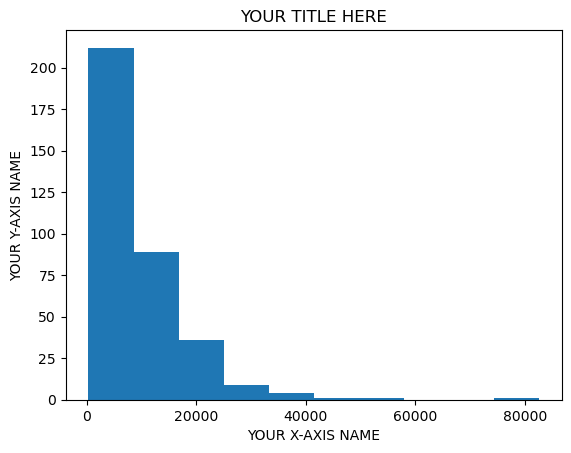

In [39]:
plt.hist(distance)
plt.xlabel('YOUR X-AXIS NAME')
plt.ylabel('YOUR Y-AXIS NAME')
plt.title('YOUR TITLE HERE')
plt.show()

## 3. Plot the Period-Luminosity Relationship from Cepheid Data
We will now derive the Period-Luminosity relationship from our database of Cepheids. Below, plot the following:
- x-axis: logarithm of the pulsation period
- y-axis: absolute magnitude ($MV$) of each Cepheid


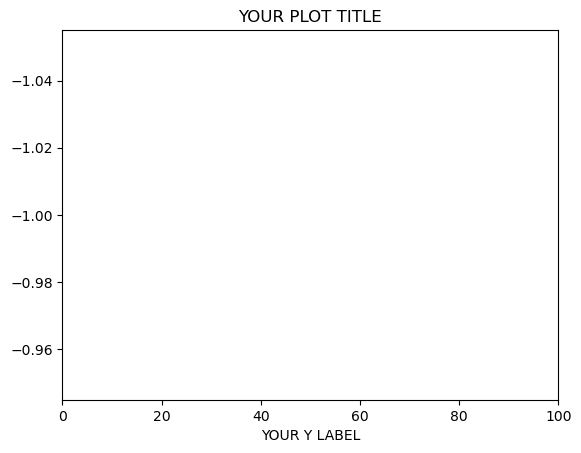

In [88]:
plt.scatter(x=-1,y=-1) # put in the Cepheid data
plt.xlim(0,100)
plt.title('YOUR PLOT TITLE')
plt.xlabel('YOUR X LABEL')
plt.xlabel('YOUR Y LABEL')
plt.gca().invert_yaxis()
plt.show()

What do you notice about this relationship? What kind of equation can describe the best fit line? Do longer period Cepheids tend to be brighter or dimmer?

## 4. Estimate the Period-Luminosity relationship
Try to fit a line manually to this data using the relationship: $y = mx + b$. In other words, you will need to find a $m$ and $b$ that best fits the data.


Overplot your best fit line on the data. How well does it appear to fit?

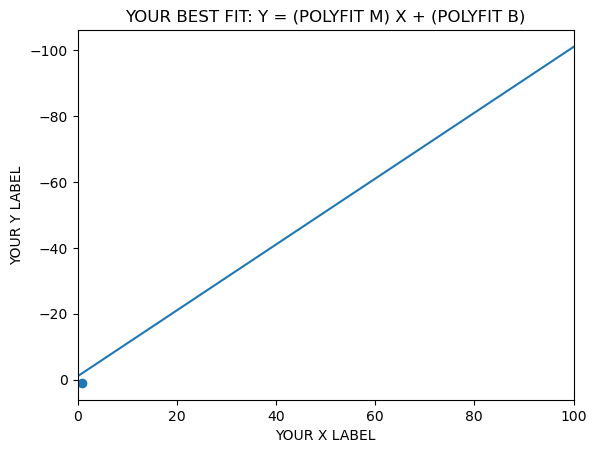

In [100]:
x = np.arange(0,100+1)
m = -1 # your m value
b = -1 # your b value

plt.scatter(x=1,y=1) # put in the Cepheid data 
plt.plot(x, m*x+b) # your best fit 

plt.xlim(0,100)
plt.title('YOUR BEST FIT: Y = (POLYFIT M) X + (POLYFIT B)')
plt.xlabel('YOUR X LABEL')
plt.ylabel('YOUR Y LABEL')
plt.gca().invert_yaxis()
plt.show()

Now, we will use a python package that makes fitting lines easy: np.polyfit(), which takes the x and y data, along with the polynomial degree (1 for a linear function). How does the polyfit's estimate compare to yours?

In [96]:
fit = np.polyfit(x = np.log10(c_data['period']), y = c_data['MV'], deg=1) # running best fit
x = np.arange(0,2+1)
m = fit[0] # m value from fit
b = fit[1] # b value from fit

Next, overplot the best fit polyfit on the Cepheid data

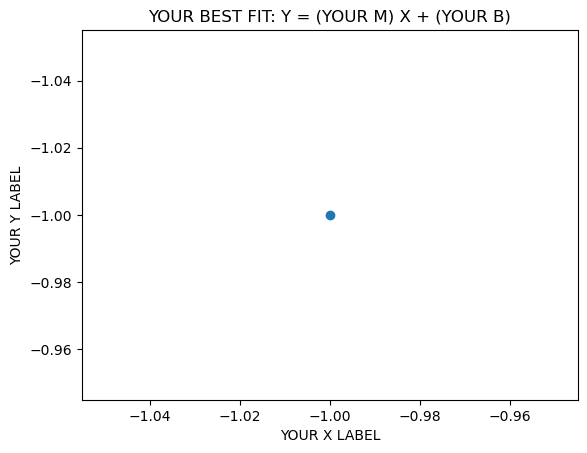

In [99]:
plt.plot(-1, -1) # plot the best fit from np.polyfit
plt.scatter(x=-1, y=-1) # plot your Cepheid Data
plt.gca().invert_yaxis()
plt.xlabel('YOUR X LABEL')
plt.ylabel('YOUR Y LABEL')
plt.title('YOUR BEST FIT: Y = (POLYFIT M) X + (POLYFIT B)')
plt.show()

## 5. Hubble's Cepheid (M31 V1)
INSERT PHOTOGRAPHIC PLATE

### Estimate the period of M31 V1
In this directory there is a file called 'aavsodata_64a49d2422f48.txt.' This file has photometric data of Hubble's Cepheid, M31 V1 from 1999 to now. Hubble used the period of this Cepheid to estimate the distance to Andromeda, M31. This file has two columns we are interested in: the 'Magnitude' and 'JD' columns. Here JD means Julian Date, which is a measure of time in units of days.

Below, look at the data file of M31 V1. Do you see the Magnitude and JD columns?

In [3]:
M31_V1 = pd.read_csv('/Users/zohaggard/Desktop/aavsodata_64a49d2422f48.txt')

Next, plot the following:
- 'JD' on the x-axis
- 'Magnitude' on the y-axis

Do you notice any periodicity? Change your x-limits if you don't already see the periodicity. As a hint, you can grab the minimum value of a list in a table by writing:
- YOURTABLE['YOURCOLUMN'].min()

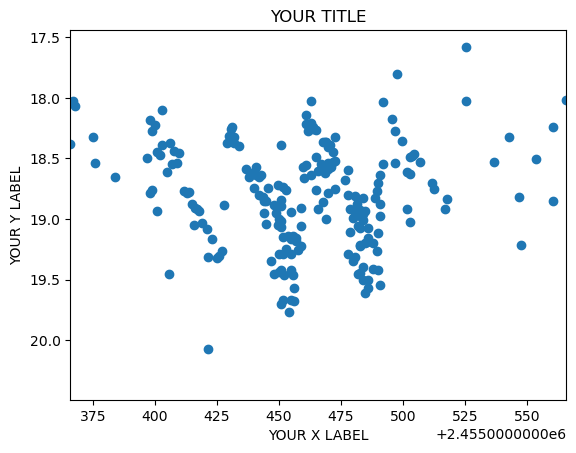

In [18]:
plt.scatter(M31_V1['JD'], M31_V1['Magnitude']) # insert M31 V1's data here
plt.gca().invert_yaxis()
plt.xlabel('YOUR X LABEL')
plt.ylabel('YOUR Y LABEL')
plt.title('YOUR TITLE')
plt.xlim() # insert your limits here
plt.show()

Estimate the period of M31 V1. Remember, a period is defined as the time it takes for a sin wave to oscillate from high values to low values and back to high values.

We will now plot M31 V1's data and and your period estimate. Does your period estimate look ok?

/Users/zohaggard/opt/anaconda3/envs/astroconda37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/zohaggard/opt/anaconda3/envs/astroconda37/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sin
  after removing the cwd from sys.path.


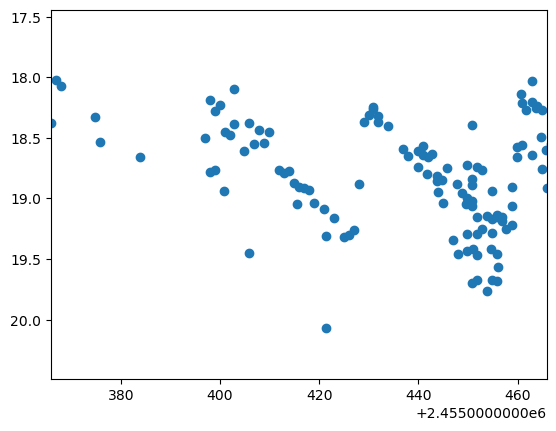

In [35]:
x = np.arange(M31_V1['JD'].min(), M31_V1['JD'].max())
period = 0 # your period
plt.scatter() # plot M31 V1 data
plt.plot(x, 1*np.sin(((2*np.pi*x/period)))+19) # plotting a sin wave, an estimate of the oscillation shape
plt.xlim() # put in your limits from above
plt.gca().invert_yaxis()
plt.show()

### Using M31 V1's period and your Period-Luminoisty fit, what is the distance to Andromeda? 